#### Credit Card Fraud Detection:

The purpose of this notebook is to:

- Create a model to determine if a credit card transaction if fraudulent or not. 
- Build familiarity of techniques used to deal with unbalanced datasets. 
- Use MlFlow to track experiment runs and performance.
- Use Model Registry from MlFlow. 

Import Packages:

In [79]:
# Data handling:
import pandas as pd

#Visualisations:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import seaborn as sns

# Preprocessing:
from sklearn.preprocessing import RobustScaler

# Modelling: 
import mlflow 

In [60]:
data = pd.read_csv('./data/creditcard.csv')

Basic EDA to see:

- Number of datapoints. 
- Number of features
- Types of features: categorical/numerical. 

In [61]:
data.shape

(284807, 31)

In [62]:
print(f'Raw features are: {data.columns}')

Raw features are: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Feature type distributions:

In [63]:
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [64]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [65]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Null value check:

In [66]:
null_vals = data.isnull().sum(axis=1).max()
print(f'Number of null values: {null_vals}')

Number of null values: 0


Conclusions:

- We can see that all features aside from the classification column are floats.
- All features aside from "Amount" are labelled as V followed by a number, hence trying to feature reduce intuitavely isn't an option. We can think of these features as outputs of a dimension reduction algorithm like PCA - where we don't know their intuitive meaning.
- No features have missing values.  
- All "V" features have mean 0 suggesting they are already scaled, "Amount" and "Time" have not been scaled. 

In [67]:
class_fig = px.histogram(data, x="Class", width=500, height=400, opacity=0.7)
class_fig.update_layout(yaxis={"title" : "Count"}, title="Label Distribution", xaxis={"title" : "Class", "tick0" : 0, "dtick" : 1})
class_fig.show()

In [68]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We can see that only 492/284315 ~ 0.17% of the datapoints are fraudulent. We need to take care on which metrics we use to evaluate model performance as even a basic model suggesting all transactions are non-fraudulent will achieve 99%+ accuracy. 

In [69]:
amount_fig = px.histogram(data, x="Amount", histnorm="percent", width=800, height=400, nbins=1000, opacity=0.7)
amount_fig.update_layout(xaxis_range=[0, 6000], title="Amount Distribution", yaxis={"title" : "Percentage of transactions(%)"})
amount_fig.show()

As mentioned previously, we have an unbalanced dataset. To build our training dataset I'll take the complete list of fraudulent transactions and randomly sample an equal number of non-fraudulent transactions. That way although our training dataset will be much smaller, it will be balanced. - this technique is called "Random Undersampling"

In [70]:
# Will use all fraudulent transactions in new dataset:
fraud_df = data.loc[data["Class"] == 1]
non_fraud_df = data.loc[data["Class"] == 0]

num_fraud = fraud_df.shape[0]
non_fraud_df_sample = non_fraud_df.sample(n=num_fraud)

model_df = pd.concat([fraud_df, non_fraud_df_sample])
#Shuffling dataset as some models behave differently based on order:
model_df = model_df.sample(frac=1, random_state=42)

In [71]:
model_df.shape

(984, 31)

In [72]:
class_fig_balanced = px.histogram(model_df, x="Class", width=500, height=400, opacity=0.7)
class_fig_balanced.update_layout(yaxis={"title" : "Count"}, title="Label Distribution", xaxis={"title" : "Class", "tick0" : 0, "dtick" : 1}, bargap=0.25)
class_fig_balanced.show()

##### Correlation Matrices:




Here I plot a correlation matrix to understand which features may have the most predictive power in determining whether a transaction is fraudulent or not. 

Notes:

- Plot the correlation matrix with the balanced dataset as this will help us understand which features have predictive power on both fraud/non-fraudulent transactions. Using the unbalanced dataset will likely just show which features are correlated with non-fraudulent transactions. 
- Features that are highly correlated - atleast one can be dropped. 
- We can try to remove outliers from features that are highly correlated with the label. Extreme values can "stretch" decision boundaries, however need to be careful in determining what an outlier is to avoid information loss. We should test both cases and see if outlier removal has been useful or not. 

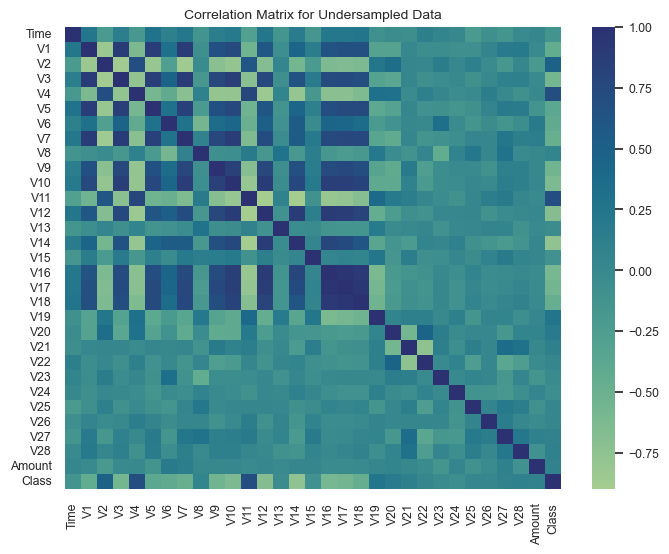

In [73]:
# All features are numerical hence all features are in the corr_mat.
corr_mat = model_df.corr()
sns.set(font_scale=0.8)
plt.figure(figsize=(8, 6), dpi=100)
corr_mat_plot = sns.heatmap(corr_mat, cmap="crest", xticklabels=True, yticklabels=True)
plt.title("Correlation Matrix for Undersampled Data", fontsize=10)
plt.show()

In [76]:
corr_mat.loc[corr_mat["Class"] >=0.65]

Time        V1        V2        V3        V4        V5        V6  \
V4    -0.188723 -0.618755  0.688905 -0.767063  1.000000 -0.582658 -0.421254   
V11   -0.288479 -0.532949  0.623161 -0.718003  0.784902 -0.533774 -0.492357   
Class -0.121857 -0.437334  0.491165 -0.569089  0.702988 -0.378537 -0.416871   

             V7        V8        V9  ...       V21       V22       V23  \
V4    -0.706415  0.108883 -0.787422  ... -0.027352  0.123067  0.027666   
V11   -0.640537  0.172201 -0.697340  ...  0.144480  0.032540 -0.032368   
Class -0.476487  0.065495 -0.546031  ...  0.120738  0.021787 -0.020081   

            V24       V25       V26       V27       V28    Amount     Class  
V4    -0.035787 -0.006968  0.143163  0.002147 -0.085042 -0.000650  0.702988  
V11   -0.107023  0.030387  0.142846  0.176408  0.038022 -0.011904  0.690092  
Class -0.057064  0.037305  0.035169  0.086655  0.100577  0.081021  1.000000  

[3 rows x 31 columns]

In [77]:
corr_mat.loc[corr_mat["Class"] <= -0.65]

Time        V1        V2        V3        V4        V5        V6  \
V12  0.240788  0.597489 -0.672498  0.762660 -0.834578  0.622888  0.506038   
V14  0.163714  0.445713 -0.570327  0.655366 -0.790055  0.436465  0.543610   

           V7        V8        V9  ...       V21       V22       V23  \
V12  0.717561 -0.172773  0.765364  ... -0.071449 -0.118523  0.011426   
V14  0.542392 -0.193505  0.674838  ... -0.219987  0.053084  0.022040   

          V24       V25       V26       V27       V28    Amount     Class  
V12  0.009057  0.031832 -0.108595 -0.028669 -0.000245  0.013283 -0.682542  
V14  0.108109 -0.082960 -0.147063 -0.205501 -0.130946  0.033573 -0.752233  

[2 rows x 31 columns]

Let's draw some boxplots of these correlated features to understand their distributions and number of outliers that might affect our model. We split the distributions by class as what might be an outlier for one class may not be an outlier for another class.

In [113]:
pos_corr = ["V4", "V11"]
neg_corr = ["V12", "V14"]

corr_ftrs = pos_corr + neg_corr

box_plots = make_subplots(rows=1, cols=4,
                          subplot_titles=corr_ftrs)

for row_num, ftr in enumerate(corr_ftrs):

    for class_label in [0,1]:
        sub_df = model_df.loc[model_df["Class"] == class_label]
    # fraud_sub_df = model_df.loc[model_df["Class"] == 1]
    # non_fraud_sub_df = model_df.loc[model_df["Class"] == 0]

        box_plots.add_trace(go.Box(y=sub_df[ftr],
                                   x=sub_df["Class"],
        name=f"Suspected Outliers - {ftr}",
        boxpoints='suspectedoutliers', # only suspected outliers
        marker=dict(
            color='rgb(8,81,156)',
            outliercolor='rgba(219, 64, 82, 0.6)',
            line=dict(
                outliercolor='rgba(219, 64, 82, 0.6)',
                outlierwidth=2)),
        line_color='rgb(8,81,156)'), 
        row=1, col=row_num+1)

box_plots.update_layout(title="Boxplot for Correlated Features", showlegend=False)
box_plots.show()


##### Preprocessing:

Normalising the "time" and "amount" features: I'll use a robust scaler to account for outliers - making sure to apply the robust scaler after Random Undersampling as part of the test set will originate from the original dataset. 

In [16]:
#Robust scaler - scales values by using a mean/variance from values that aren't outliers. 
time_robust_scaler = RobustScaler()
amount_robust_scaler = RobustScaler()
model_df["scaled_amount"] = amount_robust_scaler.fit_transform(model_df["Amount"].values.reshape(-1,1))
model_df["scaled_time"] = time_robust_scaler.fit_transform(model_df["Time"].values.reshape(-1,1))
data.drop(columns=["Amount", "Time"], inplace=True)

In [17]:
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 29 columns]